In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
np.random.seed(0)

## Logistic regression 

This last task will cover the logistic regression problem. And will actually be the easisest one to implement. Why? Because you did everthing before. As seen in the lab notes the steps and optimization are verry similar ot the linear regression problem. There are only a few changes to make nameley the loss function, hyposis and a small update to the gradient computation. We will also add a new metric at the end to evaluate the performce.

## Data Processing

Simalr to the last time we are going to load the data and process it in the same manner, meaning:

- Split the dataset into training and test sets.
- Normalize the data based on the training set.
- Add a bias term (a column of ones) to the design

The number of features may deffer and the meaning of them but the design matrix will be procesed in the same manner. The target variable is now descrete but does not influence this step. 

### 1.1 Load the Brest Cancer Dataset

We will use the `load_breast_cancer` dataset from `sklearn`. The cell below loads the dataset and displays the feature names.

### 1.2 Data Preprocessing

To evaluate the performance of our linear regression model, we need to split the data into a **training set** and a **test set**. We will:
- Learn the model on the training set.
- Test the model on the test set.

#### Bias Trick:
As in the PLA and Linear Regression model, we will take advantage of the **bias trick** by adding a column of ones to the feature matrix.

#### Normalization:
Since the features in the dataset have different ranges, we need to normalize the data. The normalization is performed using the following formula:

$$
x = \frac{x - \mu}{\sigma}
$$

Where:
- $ \mu $ is the mean of each feature.
- $ \sigma $ is the standard deviation of each feature.

**Note:** The normalization parameters $ \mu $ and $ \sigma $ are computed **only from the training set** and then used to normalize both the training and test sets.

#### Steps:
- Split the dataset into training and test sets.
- Normalize the data based on the training set.
- Add a bias term (a column of ones) to the design


In [2]:
# load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names

print(f'The dataset has {X.shape[0]} samples and {X.shape[1]} features')

The dataset has 569 samples and 30 features


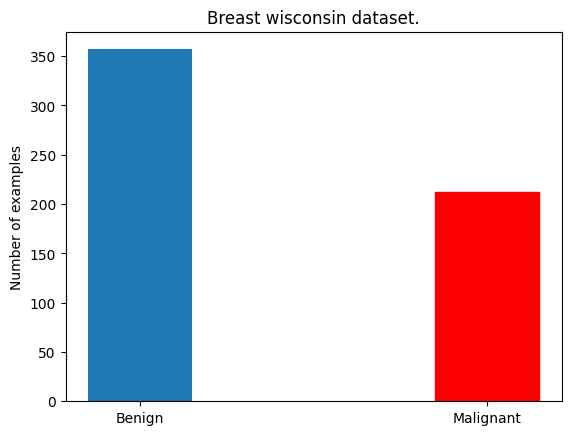

In [3]:
# visualize the dataset using histogram
labels = ['Benign','Malignant']
population = [np.sum(y),np.sum(y==0)]
y_pos = np.arange(len(labels))
barlist = plt.bar(y_pos, population, align='center',width=0.3)
plt.xticks(y_pos, labels)
plt.ylabel('Number of examples')
plt.title('Breast wisconsin dataset.')
barlist[1].set_color('r')
plt.show()

In [4]:
# dispalay the min max value of each feature
for i in range(X.shape[1]):
    print(f"{feature_names[i]}: min={np.min(X[:,i])}, max={np.max(X[:,i])}")

mean radius: min=6.981, max=28.11
mean texture: min=9.71, max=39.28
mean perimeter: min=43.79, max=188.5
mean area: min=143.5, max=2501.0
mean smoothness: min=0.05263, max=0.1634
mean compactness: min=0.01938, max=0.3454
mean concavity: min=0.0, max=0.4268
mean concave points: min=0.0, max=0.2012
mean symmetry: min=0.106, max=0.304
mean fractal dimension: min=0.04996, max=0.09744
radius error: min=0.1115, max=2.873
texture error: min=0.3602, max=4.885
perimeter error: min=0.757, max=21.98
area error: min=6.802, max=542.2
smoothness error: min=0.001713, max=0.03113
compactness error: min=0.002252, max=0.1354
concavity error: min=0.0, max=0.396
concave points error: min=0.0, max=0.05279
symmetry error: min=0.007882, max=0.07895
fractal dimension error: min=0.0008948, max=0.02984
worst radius: min=7.93, max=36.04
worst texture: min=12.02, max=49.54
worst perimeter: min=50.41, max=251.2
worst area: min=185.2, max=4254.0
worst smoothness: min=0.07117, max=0.2226
worst compactness: min=0.027

In [8]:
def add_intercept(X):
    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #Output: X: a numpy array of shape (N, D+1), where a column of ones is concatenated to the input array X

    ########## Your code goes here ##########
    X = np.vstack((np.ones(X.shape[0]), X.T)).T
    return X

    #########################################

    return X

def normalize(X, mean=None, std=None):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        mean: a numpy array of shape (D,) containing the mean of each feature
    #        std: a numpy array of shape (D,) containing the standard deviation of each feature
    # Output: X: a numpy array of shape (N, D), where each feature is normalized by subtracting the mean and dividing by the standard deviation

    ########## Your code goes here ##########

    X = (X - mean) / std

    #########################################

    return X

def split_data(X, y, ratio=0.8):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_test, y_test = None, None, None, None
    num_samples = None

    ########## Your code goes here ##########
    permutation = np.random.permutation(X.shape[0])
    training_size = int(ratio * X.shape[0])
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    X_train = X_shuffled[:training_size]
    y_train = y_shuffled[:training_size]
    X_test = X_shuffled[training_size:]
    y_test = y_shuffled[training_size:]
    #########################################

    return X_train, y_train, X_test, y_test


def prepocess_data(X, y, ratio=0.8):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D+1), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D+1), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_test, y_test = None, None, None, None

    ########## Your code goes here ##########

    # Split the data
    X_train, y_train, X_test, y_test = split_data(X, y, ratio)

    # Compute the mean and std of the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    # Normalize the training data
    X_train = normalize(X_train, mean, std)
    X_test = normalize(X_test, mean, std)
    # Add intercept to both training and testing data
    X_train = add_intercept(X_train)
    X_test = add_intercept(X_test)
    ########## Your code goes here ##########

    return X_train, y_train, X_test, y_test

In [9]:
# Run preprocessing on the data
X_train, y_train, X_test, y_test = prepocess_data(X, y)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the test set is:')
print(X_test.shape, y_test.shape)


The shape of the training set is:
(455, 31) (455,)
The shape of the test set is:
(114, 31) (114,)


## Logistic Regression Implementation 

In this section, we will implement the essential components of Logistic Regression.

### 2.1 Implement the Sigmoid Function
Implement the `sigmoid` function, which takes as input a NumPy array or scalar and returns the sigmoid of the input element wise.

The sigmoid function is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

### 2.2 Implement the Logistic Regression Hypothesis

Implement the `predict` method. This method should take as input:
- A NumPy array of features
- A corresponding set of weights 

It should return the predicted values (i.e., the hypothesis) for the input data, using the logistic regression model.

### 2.3 Implement the Loss Function

Implement the `compute_loss` function using Binary Cross-Entropy (BCE) loss. 

The BCE loss function is defined as:

$$
- \sum_{i=1}^{m} \left( y_i \log h(\mathbf{x}_i) + (1 - y^{(i)}) \log \left( 1 - h(\mathbf{x}_i) \right) \right).
$$

where $ y_i $ are the true labels, and $h(\mathbf{x}_i)$ are the predicted probabilities.

### 2.4 Implement the Gradient Computation

Implement the `compute_gradient` function to calculate the gradients needed for updating the model weights. 

Hint: The gradient computation is similar to that in linear regression, but with the logistic regression hypothesis instead.

Note: The implementation should be done in vectorized form. (Bached implementation)



In [20]:
def sigmoid(x):

    # Input: x: a numpy array
    # out: rez: a numpy array containing the sigmoid of the input array

    out = None

    ########## Your code goes here ##########
    out = 1 / (1 + np.exp(-x))
    #########################################

    return out


def predict(X, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: pred: a numpy array of shape (N,), containing the predicted values for the input data

    pred = None

    ########## Your code goes here ##########
    wTX = np.dot(X, w)
    pred = sigmoid(wTX)

    #########################################

    return pred

def compute_loss(X, y, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: loss: a float number representing the average loss

    loss = None

    ########## Your code goes here ##########
    predictions = predict(X, w)
    eps = 1e-10
    predictions = np.clip(predictions, eps, 1 - eps)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    #########################################

    return loss

def compute_gradient(X, y, w):

    grad = None

    ########## Your code goes here ##########
    prediction = predict(X, w)
    errors = prediction - y
    grad = (1 / X.shape[0]) * np.dot(X.T, errors)

    #########################################

    return grad

def compute_accuracy(X, y, w, threshold=0.5):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        threshold: a float number representing the threshold for the classification
    # Output: acc: a float number representing the accuracy of the model

    acc = None

    ########## Your code goes here ##########
    predictions = predict(X, w)
    predicted_classes = (predictions >= threshold).astype(int)
    correct_predictions = (predicted_classes == y).astype(int)
    acc = np.sum(correct_predictions) / X.shape[0]
    
    #########################################

    return acc

## 3. Training and Testing Script

The training and testing scripts are similar to those used in linear regression. However, for logistic regression, you should also add the accuracy metric to both the train and test functions.

### 3.1 Implement the Train Function

Implement the `train` function, which optimizes the model parameters. 

In addition to optimizing the weights using logistic regression, make sure to:
- Compute and store the accuracy for each training step.
- Return the list of computed accuracies alongside the optimized weights.

### 3.2 Implement the Test Function

Implement the `test` function to evaluate the model on unseen data.

For this function:
- Compute the loss on the test data.
- Compute and return the accuracy of the model on the test data along with the loss.


In [21]:
def train(X, y, w, alpha, no_iterations):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        alpha: a float number representing the learning rate
    #        no_iterations: an integer representing the number of iterations
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model
    #         losses: a list of floats containing the loss at each update
    #         accuraces: a list of floats containing the accuracy at each update

    losses = []
    accuraces = []

    for step in range(no_iterations):

        ########## Your code goes here ##########
        loss = compute_loss(X, y, w)
        grad = compute_gradient(X, y, w)
        accuracy = compute_accuracy(X, y, w)
        w = w - alpha * grad
        losses.append(loss)
        accuraces.append(accuracy)
        
        #########################################

    return w, losses, accuraces

def test(X, y, w):

    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #       y: a numpy array of shape (N,), containing the target for each sample
    #       w: a numpy array of shape (D,), containing the weights of the linear model
    #Output: loss: a float number representing the loss of the model
    #        accuracy: a float number representing the accuracy of the model
    
    loss, accuracy = None, None
    
    ########## Your code goes here ##########
    loss = compute_loss(X, y, w)
    accuracy = compute_accuracy(X, y, w)
    

    ######################################### 

    return loss, accuracy

Stochastic Gradient Descent loss on test: 0.004567155736004989
Stochastic Gradient Descent accuracy on test: 0.7982456140350878


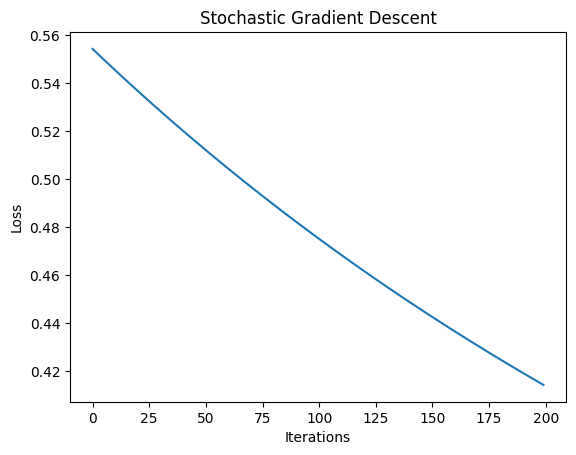

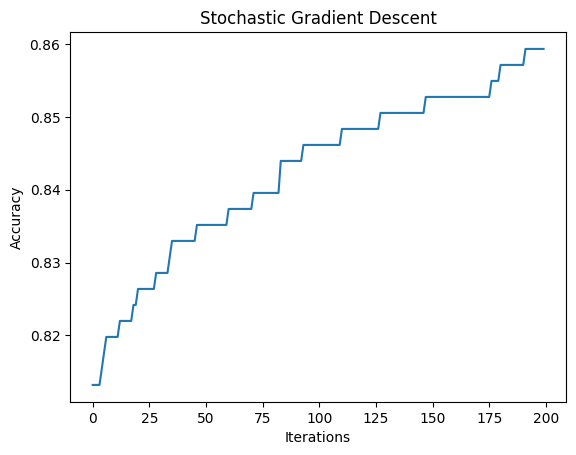

In [22]:
w = np.random.randn(X_train.shape[1])
alpha = 0.003

w, losses_train, accuracies_train = train(X_train, y_train, w, alpha, no_iterations=200)

loss_test, accuracy_test = test(X_test, y_test, w)

print(f'Stochastic Gradient Descent loss on test: {loss_test / X_test.shape[0]}')
print(f'Stochastic Gradient Descent accuracy on test: {accuracy_test}')

#Plot side by side the losses of the two algorithms should be 2 difffetn figures
plt.figure()
plt.plot(losses_train)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.show()

#display the accuracy of the logistic regression on the training set
plt.figure()
plt.plot(accuracies_train)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Stochastic Gradient Descent')
plt.show()

